>epoch=0, lrate=0.005, error=2.024
>epoch=1, lrate=0.005, error=0.876
>epoch=2, lrate=0.005, error=0.801
>epoch=3, lrate=0.005, error=0.723
>epoch=4, lrate=0.005, error=0.662
>epoch=5, lrate=0.005, error=0.616
>epoch=6, lrate=0.005, error=0.582
>epoch=7, lrate=0.005, error=0.557
>epoch=8, lrate=0.005, error=0.538
>epoch=9, lrate=0.005, error=0.524
[-0.008353771036565753, 0.13999304739443277, -0.04260022757125455]
iter 0 | J: 1604.873
iter 1 | J: 1586.636
iter 2 | J: 1568.768
iter 3 | J: 1551.261
iter 4 | J: 1534.107
iter 5 | J: 1517.301
iter 6 | J: 1500.833
iter 7 | J: 1484.699
iter 8 | J: 1468.890
iter 9 | J: 1453.401
iter 10 | J: 1438.224
iter 11 | J: 1423.354
iter 12 | J: 1408.785
iter 13 | J: 1394.509
iter 14 | J: 1380.522
iter 15 | J: 1366.817
iter 16 | J: 1353.389
iter 17 | J: 1340.232
iter 18 | J: 1327.341
iter 19 | J: 1314.710
iter 20 | J: 1302.334
iter 21 | J: 1290.207
iter 22 | J: 1278.325
iter 23 | J: 1266.683
iter 24 | J: 1255.276
iter 25 | J: 1244.100
iter 26 | J: 1233.148

iter 981 | J: 699.300
iter 982 | J: 699.300
iter 983 | J: 699.300
iter 984 | J: 699.300
iter 985 | J: 699.300
iter 986 | J: 699.300
iter 987 | J: 699.300
iter 988 | J: 699.300
iter 989 | J: 699.300
iter 990 | J: 699.300
iter 991 | J: 699.300
iter 992 | J: 699.300
iter 993 | J: 699.300
iter 994 | J: 699.300
iter 995 | J: 699.300
iter 996 | J: 699.300
iter 997 | J: 699.300
iter 998 | J: 699.300
iter 999 | J: 699.300


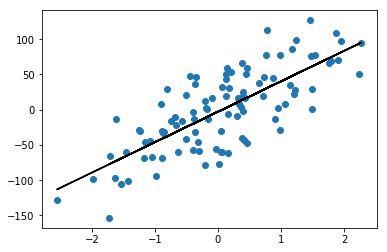

Done!
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 1.184024660
Epoch: 0002 cost= 0.665235108
Epoch: 0003 cost= 0.552798653
Epoch: 0004 cost= 0.498540901
Epoch: 0005 cost= 0.465451202
Epoch: 0006 cost= 0.442559050
Epoch: 0007 cost= 0.425484205
Epoch: 0008 cost= 0.412150554
Epoch: 0009 cost= 0.401385643
Epoch: 0010 cost= 0.392417915
Epoch: 0011 cost= 0.384746922
Epoch: 0012 cost= 0.378189914
Epoch: 0013 cost= 0.372384727
Epoch: 0014 cost= 0.367278805
Epoch: 0015 cost= 0.362663095
Epoch: 0016 cost= 0.358535774
Epoch: 0017 cost= 0.354853771
Epoch: 0018 cost= 0.351452216
Epoch: 

FileNotFoundError: File b'/home/b1/ml_lab_ecsc_306/m.csv' does not exist

In [1]:
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            sum_error += error**2
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return coef

# Calculate coefficients
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
l_rate = 0.005
n_epoch = 10
coef = coefficients_sgd(dataset, l_rate, n_epoch)
print(coef)



import numpy as np
import random
from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats

def gradient_descent_2(alpha, x, y, numIterations):
    m = x.shape[0] # number of samples
    theta = np.ones(2)
    x_transpose = x.transpose()
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m)  # cost
        print ("iter %s | J: %.3f" % (iter, J)  )    
        gradient = np.dot(x_transpose, loss) / m         
        theta = theta - alpha * gradient  # update
    return theta

if __name__ == '__main__':

    x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35) 
    m, n = np.shape(x)
    x = np.c_[ np.ones(m), x] # insert column
    alpha = 0.01 # learning rate
    theta = gradient_descent_2(alpha, x, y, 1000)

    # plot
    for i in range(x.shape[1]):
        y_predict = theta[0] + theta[1]*x 
    pylab.plot(x[:,1],y,'o')
    pylab.plot(x,y_predict,'k-')
    pylab.show()
    print ("Done!")



from __future__ import print_function

import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    

    import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op


#Machine Learning Online Class - Exercise 2: Logistic Regression

#Load Data
#The first two columns contains the exam scores and the third column contains the label.

data = pd.read_csv('/home/b1/ml_lab_ecsc_306/m.csv', header = None)
X = np.array(data.iloc[:, 0:2]) #100 x 3
y = np.array(data.iloc[:,2]) #100 x 1
y.shape = (len(y), 1)


#Creating sub-dataframes for plotting
pos_plot = data[data[2] == 1]
neg_plot = data[data[2] == 0]


#==================== Part 1: Plotting ====================
#We start the exercise by first plotting the data to understand the 
#the problem we are working with.

print('Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.')

plt.plot(pos_plot[0], pos_plot[1], "+", label = "Admitted")
plt.plot(neg_plot[0], neg_plot[1], "o", label = "Not Admitted")
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()


def sigmoid(z):
    '''
    SIGMOID Compute sigmoid function
    g = SIGMOID(z) computes the sigmoid of z.
    Instructions: Compute the sigmoid of each value of z (z can be a matrix,
    vector or scalar).
    '''
    g = 1 / (1 + np.exp(-z))
    return g


def costFunction(theta, X, y):
    '''
    COSTFUNCTION Compute cost and gradient for logistic regression
    J = COSTFUNCTION(theta, X, y) computes the cost of using theta as the
    parameter for logistic regression and the gradient of the cost
    w.r.t. to the parameters.
    '''
    m = len(y) #number of training examples

    h = sigmoid(X.dot(theta)) #logisitic regression hypothesis
    J = (1/m) * np.sum((-y*np.log(h)) - ((1-y)*np.log(1-h)))

    #h is 100x1, y is %100x1, these end up as 2 vector we subtract from each other
    #then we sum the values by rows
    #cost function for logisitic regression
    return J

def gradient(theta, X, y):
    m = len(y)
    grad = np.zeros((theta.shape))
    h = sigmoid(X.dot(theta))
    for i in range(len(theta)): #number of rows in theta
        XT = X[:,i]
        XT.shape = (len(X),1)
        grad[i] = (1/m) * np.sum((h-y)*XT) #updating each row of the gradient
    return grad


#============ Part 2: Compute Cost and Gradient ============
#In this part of the exercise, you will implement the cost and gradient
#for logistic regression. You neeed to complete the code in costFunction.m


#Add intercept term to x and X_test
Bias = np.ones((len(X), 1))
X = np.column_stack((Bias, X))


#Initialize fitting parameters
initial_theta = np.zeros((len(X[0]), 1))


#Compute and display initial cost and gradient
(cost, grad) = costFunction(initial_theta, X, y), gradient(initial_theta, X, y)

print('Cost at initial theta (zeros): %f' % cost)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros):')
print(grad)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628')


#Compute and display cost and gradient with non-zero theta
test_theta = np.array([[-24], [0.2], [0.2]]);
(cost, grad) = costFunction(test_theta, X, y), gradient(test_theta, X, y)

print('\nCost at test theta: %f' % cost)
print('Expected cost (approx): 0.218\n')
print('Gradient at test theta:')
print(grad)
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')


result = op.fmin_tnc(func = costFunction, x0 = initial_theta, fprime = gradient, args = (X,y))
result[1]


Result = op.minimize(fun = costFunction, 
                                 x0 = initial_theta, 
                                 args = (X, y),
                                 method = 'TNC',
                                 jac = gradient, options={'gtol': 1e-3, 'disp': True, 'maxiter': 1000})


theta = Result.x
theta

test = np.array([[1, 45, 85]]) 
prob = sigmoid(test.dot(theta))
print('For a student with scores 45 and 85, we predict an admission probability of %f,' % prob)
print('Expected value: 0.775 +/- 0.002\n')